In [1]:
from matplotlib import pyplot as plt
from skimage.io import imread
from skimage.transform import resize
import os
import random
import numpy as np

In [2]:
!unzip yalefaces.zip

Archive:  yalefaces.zip
   creating: yalefaces/
   creating: yalefaces/person-4/
  inflating: yalefaces/person-4/rightlight  
  inflating: yalefaces/person-4/leftlight  
  inflating: yalefaces/person-4/normal  
  inflating: yalefaces/person-4/noglasses  
  inflating: yalefaces/person-4/happy  
  inflating: yalefaces/person-4/centerlight  
  inflating: yalefaces/person-4/sleepy  
  inflating: yalefaces/person-4/glasses  
  inflating: yalefaces/person-4/wink  
  inflating: yalefaces/person-4/surprised  
   creating: yalefaces/person-15/
  inflating: yalefaces/person-15/rightlight  
  inflating: yalefaces/person-15/leftlight  
  inflating: yalefaces/person-15/normal  
  inflating: yalefaces/person-15/noglasses  
  inflating: yalefaces/person-15/sad  
  inflating: yalefaces/person-15/centerlight  
  inflating: yalefaces/person-15/sleepy  
  inflating: yalefaces/person-15/glasses  
  inflating: yalefaces/person-15/wink  
  inflating: yalefaces/person-15/surprised  
   creating: yalefaces/pe

In [3]:
BASE_DIR = "yalefaces"
person_folders = [
    "person-1",
    "person-2",
    "person-3",
    "person-4",
    "person-5",
    "person-6",
    "person-7",
    "person-8",
    "person-9",
    "person-10",
    "person-11",
    "person-12",
    "person-13",
    "person-14",
    "person-15"
]

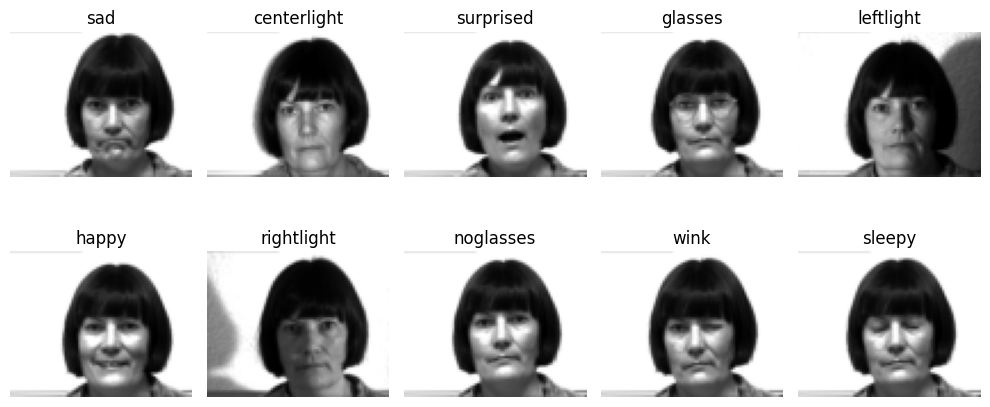

In [4]:
person_folder = random.choice(person_folders)
plt.figure(figsize=(10, 5))
for ith, filename in enumerate(os.listdir(os.path.join(BASE_DIR, person_folder))):
  image = imread(os.path.join(BASE_DIR, person_folder, filename))
  image = image.squeeze(0)
  image = resize(image, (64, 80), anti_aliasing=True)
  plt.subplot(2, 5, ith + 1)
  plt.imshow(image, cmap='gray')
  plt.axis("off")
  plt.title(f"{filename}")
plt.tight_layout()
plt.show()


In [5]:
data = {}
for person_folder in person_folders:
  for filename in os.listdir(os.path.join(BASE_DIR, person_folder)):
    image = imread(os.path.join(BASE_DIR, person_folder, filename))
    image = resize(image, (1, 64, 80), anti_aliasing=True)
    if person_folder not in data:
        data[person_folder] = [image]
    else:
        data[person_folder].append(image)

for person in data:
  data[person] = np.concat(data[person], axis=0).reshape(10, -1)

In [6]:
data["person-1"].shape

(10, 5120)

In [7]:
def standardizing(images):
    images = (images - images.mean()) / images.std()
    images = images.astype(np.float32)
    return images

### **Assignment 1 (4 scores):** Implement PCA using Numpy.

In [8]:
class PincipleComponentAnalysis:
    def __init__(self, d_principle):
      self.d_principle = d_principle

    def fit(self, X):
      cov = X.T @ X

      eigenvalues, eigenvectors = np.linalg.eig(cov)

      max_abs_idx = np.argmax(np.abs(eigenvectors), axis=0)
      signs = np.sign(eigenvectors[max_abs_idx, range(eigenvectors.shape[0])])
      eigenvectors = eigenvectors*signs[np.newaxis,:]
      eigenvectors = eigenvectors.T

      eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[i,:]) for i in range(eigenvectors.shape[0])]

      eigen_pairs.sort(key=lambda pair: pair[0], reverse=True)

      eigenvalues = np.array([value for (value, _)in eigen_pairs])
      eigenvectors = np.array([vector for (_, vector) in eigen_pairs])

      self.principle_values = eigenvalues[:self.d_principle]
      self._W = eigenvectors[:self.d_principle]

    def transform(self, X):
      X_hat = self._W @ X
      return X_hat

### **Assignment 2 (4 scores):**
- Reading the training images.
- Approximating the Principle Space having **20 dimensions**.
- Visualize the base of this Principle Space.

In [9]:
PCA = PincipleComponentAnalysis(d_principle=20)

In [10]:
images = []
for person in data:
    images.append(data[person])

images = np.concat(images, axis=0)
images = standardizing(images)
images.shape

(150, 5120)

In [11]:
PCA.fit(images)

In [12]:
PCA._W.shape

(20, 5120)

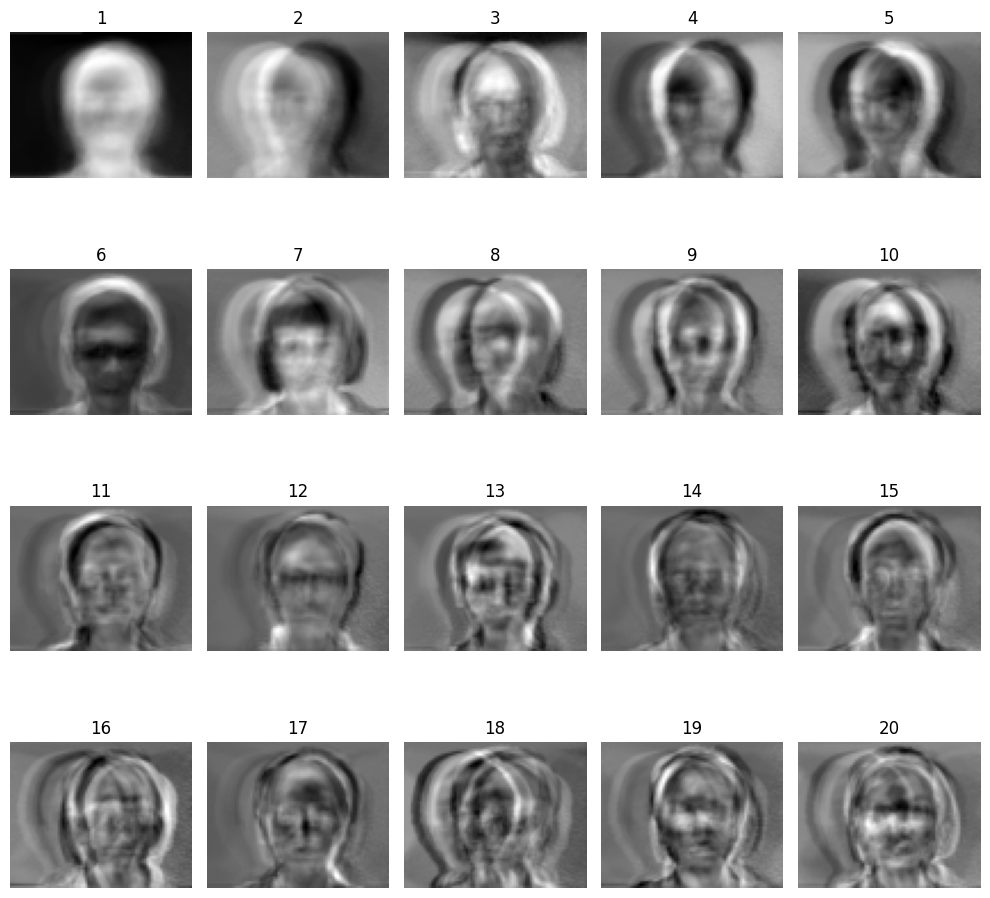

In [13]:
eigenfaces = PCA._W
eigenfaces = eigenfaces.reshape(20, 64, 80)
plt.figure(figsize=(10, 10))
for ith, eigenface in enumerate(eigenfaces):
  plt.subplot(4, 5, ith + 1)
  plt.imshow(eigenface, cmap='gray')
  plt.axis("off")
  plt.title(ith+1)

plt.tight_layout()
plt.show()

In [14]:
mean_faces = {
    person: np.mean(images, axis=0) for person, image in data.items()
}

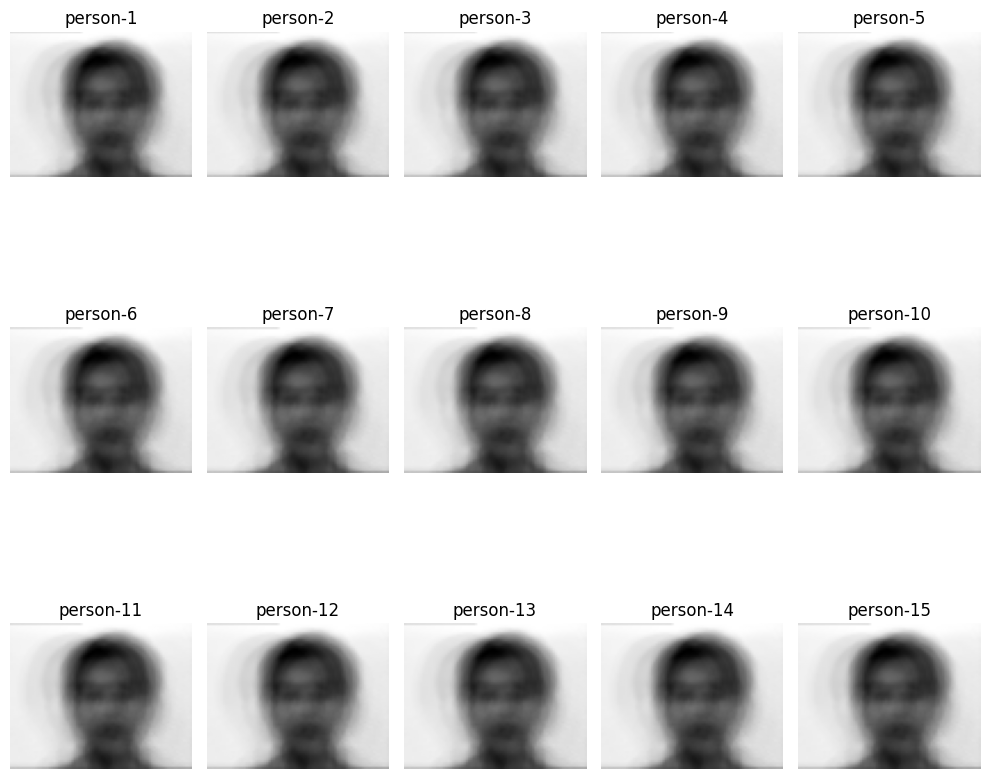

In [15]:
plt.figure(figsize=(10, 10))
for ith, person in enumerate(mean_faces):
  mean_face = mean_faces[person]
  mean_face = mean_face.reshape(64, 80)
  plt.subplot(3, 5, ith + 1)
  plt.imshow(mean_face, cmap='gray')
  plt.axis("off")
  plt.title(person)

plt.tight_layout()
plt.show()

In [16]:
projected_mean_faces = {}
for person in mean_faces:
  mean_face = mean_faces[person]
  projected_mean_faces[person] = PCA.transform(mean_face)

### **Assignment 3 (2 scores):**
- Assign persons to the face images in testing data.
- Evaluate the accuracy of this face recognition system.

In [17]:
labels = []
test_images = []
TEST_DIR = "yalefaces/test"
for filename in os.listdir(os.path.join(TEST_DIR)):
  person_name = filename.split(".")[0]
  labels.append(person_name)

  image = imread(os.path.join(TEST_DIR, filename))
  image = resize(image, (1, 64, 80), anti_aliasing=True)
  test_images.append(image)

In [18]:
test_images = np.concat(test_images, axis=0)
test_images.shape

(15, 64, 80)

In [19]:
labels

['person-6',
 'person-13',
 'person-3',
 'person-9',
 'person-2',
 'person-4',
 'person-14',
 'person-5',
 'person-7',
 'person-11',
 'person-8',
 'person-12',
 'person-15',
 'person-1',
 'person-10']

In [20]:
def Euclide_distance(X, Y):
    assert X.shape == Y.shape, f"{X.__str__()} and {Y.__str__()} are miss-shaped"
    return (((X - Y)**2).sum())**0.5

In [24]:
predictions = {}
for label, image in zip(labels, test_images):
  image = image.reshape(-1)
  projected_face = PCA.transform(image)
  closest_distance = np.inf
  closest_person = None
  for person in projected_mean_faces:
    mean_face = projected_mean_faces[person]
    distance = Euclide_distance(mean_face, projected_face)
    if distance < closest_distance:
      closest_distance = distance
      closest_person = person

  predictions[label] = closest_person

In [25]:
ENs = []
for label in predictions:
  ENs.append(label == predictions[label])

In [27]:
print(f"Accuracy: {(np.mean(ENs)*100):0.2f}%")

Accuracy: 6.67
